In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings("ignore")

Using TensorFlow backend.


## Dataset Pre-processing

In [3]:
TASKS = ["climbing","walking"]
LABELS = {
    "climbing" : 1,
    "walking" : 2,
}
SENSORS = ["Accelerometer"]
dataset_path = "dataset_new/train/"

In [4]:
data_climb = pd.DataFrame()
data_walk = pd.DataFrame()

for vals in TASKS:
    sub_dirs = [x for x in os.walk(dataset_path + vals)]
    datapoints = sub_dirs[0][1]
    for pts in datapoints:
            file_path = dataset_path + vals + "/" + pts + "/" +"Accelerometer" + ".csv"
            df = pd.read_csv(file_path)
            df.drop(axis=0, columns=['Timestamp'], inplace=True)
            df.columns = ["acc_" + x for x in df.columns]
            df.drop(df.tail(200).index, inplace=True)
            df.drop(df.head(200).index, inplace=True)
            if vals == "climbing":
                print(True)
                print(df)
                data_climb = pd.concat([data_climb, df], ignore_index=True)          
            else:
                print(False)
                print(df)
                data_walk = pd.concat([data_walk, df], ignore_index=True)

True
      acc_Milliseconds     acc_X     acc_Y      acc_Z
200               2001 -2.093735  1.757340   7.553711
201               2011 -2.257736  1.941696   7.480682
202               2022 -2.229004  2.039856   7.560883
203               2031 -2.302033  2.151184   7.911636
204               2041 -2.371460  2.355896   8.604767
205               2052 -2.258926  2.454056   9.458298
206               2061 -2.018311  2.492371  10.345352
207               2071 -1.735794  2.486374  11.085159
208               2082 -1.397018  2.507919  11.965027
209               2091 -1.085770  2.466034  12.564774
210               2101 -0.939728  2.518707  13.192047
211               2112 -1.078583  2.504333  13.736725
212               2121 -1.316818  2.318787  14.314926
213               2131 -1.576584  1.853119  14.744690
214               2142 -1.720230  1.453278  14.936233
215               2151 -1.853119  1.204285  14.805740
216               2161 -1.787277  1.078583  14.369995
217               2171 

In [5]:
data_walk_mean = data_walk.rolling(100).mean()
data_walk_std = data_walk.rolling(100).std()
data_walk_features = data_walk_mean.join(data_walk_std, lsuffix='_mean', rsuffix='_std')

data_climb_mean = data_climb.rolling(100).mean()
data_climb_std = data_climb.rolling(100).std()
data_climb_features = data_climb_mean.join(data_climb_std, lsuffix='_mean', rsuffix='_std')


In [6]:
data_walk_features.dropna(inplace=True)
data_walk_features.reset_index(drop=True, inplace=True)
data_walk_features['Label'] = 2

data_climb_features.dropna(inplace=True)
data_climb_features.reset_index(drop=True, inplace=True)
data_climb_features['Label'] = 1

# data_walk_features
# data_climb_features

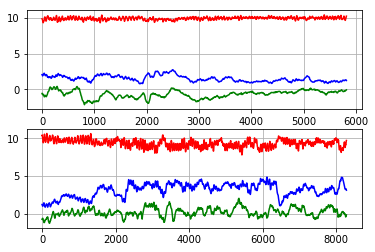

In [7]:
plt.subplot(2, 1, 1)
plt.plot(data_walk_features.acc_X_mean, 'g')
plt.plot(data_walk_features.acc_Y_mean, 'b')
plt.plot(data_walk_features.acc_Z_mean, 'r')
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(data_climb_features.acc_X_mean, 'g')
plt.plot(data_climb_features.acc_Y_mean, 'b')
plt.plot(data_climb_features.acc_Z_mean, 'r')
plt.grid()
plt.show()

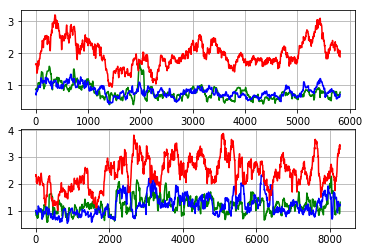

In [8]:
plt.subplot(2, 1, 1)
plt.plot(data_walk_features.acc_X_std, 'g')
plt.plot(data_walk_features.acc_Y_std, 'b')
plt.plot(data_walk_features.acc_Z_std, 'r')
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(data_climb_features.acc_X_std, 'g')
plt.plot(data_climb_features.acc_Y_std, 'b')
plt.plot(data_climb_features.acc_Z_std, 'r')
plt.grid()
plt.show()